In [1]:
import geopandas as gpd
import mercantile
import rasterio.plot

# GeoPackage 파일을 불러와서 GeoDataFrame으로 저장합니다.
# gdf = gpd.read_file("Jeongeup_out_1024.gpkg")
gdf = gpd.read_file("sample2.gpkg")

# GeoDataFrame의 경계 상자(bounding box)를 구합니다.
bounds = gdf.total_bounds

print(gdf.crs)
print(bounds)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
[126.77641385  35.62243409 126.96897399  35.7472665 ]


In [26]:
#gdf['CLS_ID'].hist()
gdf[gdf['CLS_ID']==5]

,CLS_ID,geometry
34738,5,"POLYGON ((126.87793 35.64430, 126.87793 35.644..."
34739,5,"POLYGON ((126.84207 35.67594, 126.84213 35.675..."
34740,5,"POLYGON ((126.86828 35.68376, 126.86832 35.683..."
34741,5,"POLYGON ((126.81498 35.62288, 126.81499 35.622..."
34742,5,"POLYGON ((126.81507 35.62327, 126.81508 35.623..."
...,...,...
36835,5,"POLYGON ((126.93584 35.71494, 126.93612 35.714..."
36836,5,"POLYGON ((126.78598 35.71476, 126.78609 35.714..."
36837,5,"POLYGON ((126.82191 35.71482, 126.82253 35.714..."
36838,5,"POLYGON ((126.95149 35.71494, 126.95151 35.714..."


<AxesSubplot:>

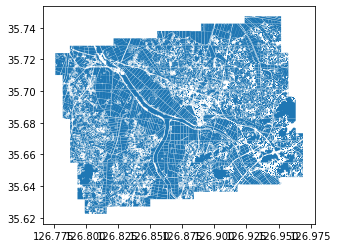

In [2]:
# gpd.GeoDataFrame({'geometry': [mercantile.feature(t) for t in tiles]}, crs=gdf.crs)
# print(gdf.crs)
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
from shapely.geometry import Point

# gdf = gpd.GeoDataFrame(gdf, geometry='geometry')

gdf.plot()
#gdf.head()


In [45]:
tiles_list = list(mercantile.tiles(*bounds, zooms=13))
print(len(tiles_list))

# mercantile.bounding_tile(*bounds)

# tiles = list(mercantile.tiles(0, 0, 100, 100, zooms=12))
# # print(bounds)
tiles = []

for idx, t in enumerate(tiles_list):
    ll = mercantile.bounds(t)
    print(t, ll)
    p = Polygon([(ll.west, ll.south), (ll.west, ll.north), (ll.east, ll.north), (ll.east, ll.south)])
    df_tile = gpd.GeoDataFrame({'geometry': gpd.GeoSeries(p)}, crs=gdf.crs)
    gdf_tile = gpd.sjoin(gdf, df_tile, predicate='intersects')
    # print(idx)
    if len(gdf_tile) > 0:
        tiles.append(gdf_tile)

30
Tile(x=6980, y=3223, z=13) LngLatBbox(west=126.73828125, south=35.746512259918504, east=126.7822265625, north=35.78217070326606)
Tile(x=6980, y=3224, z=13) LngLatBbox(west=126.73828125, south=35.71083783530008, east=126.7822265625, north=35.746512259918504)
Tile(x=6980, y=3225, z=13) LngLatBbox(west=126.73828125, south=35.67514743608467, east=126.7822265625, north=35.71083783530008)
Tile(x=6980, y=3226, z=13) LngLatBbox(west=126.73828125, south=35.63944106897394, east=126.7822265625, north=35.67514743608467)
Tile(x=6980, y=3227, z=13) LngLatBbox(west=126.73828125, south=35.6037187406973, east=126.7822265625, north=35.63944106897394)
Tile(x=6981, y=3223, z=13) LngLatBbox(west=126.7822265625, south=35.746512259918504, east=126.826171875, north=35.78217070326606)
Tile(x=6981, y=3224, z=13) LngLatBbox(west=126.7822265625, south=35.71083783530008, east=126.826171875, north=35.746512259918504)
Tile(x=6981, y=3225, z=13) LngLatBbox(west=126.7822265625, south=35.67514743608467, east=126.826

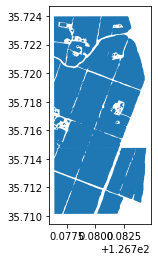

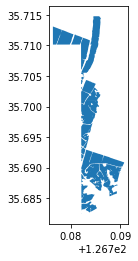

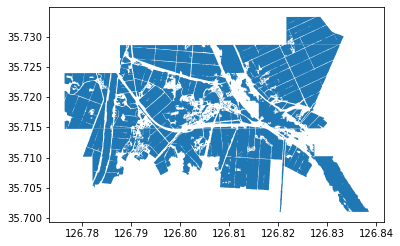

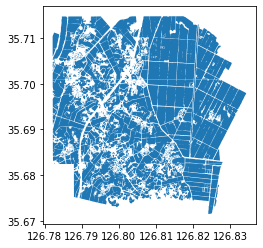

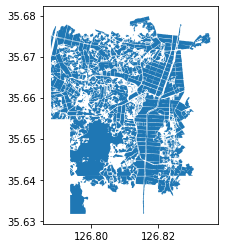

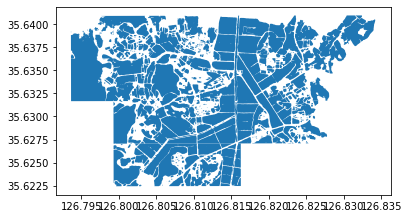

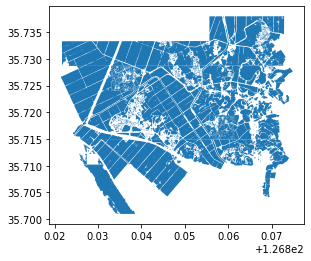

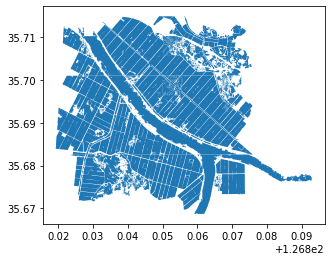

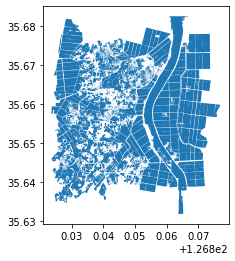

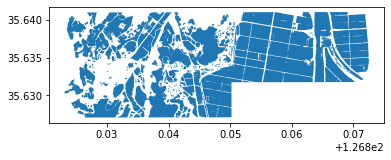

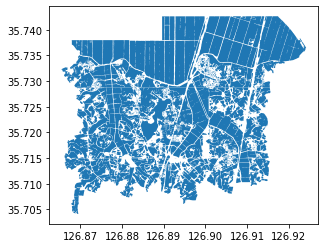

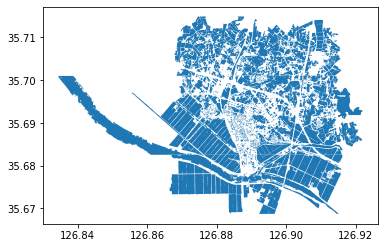

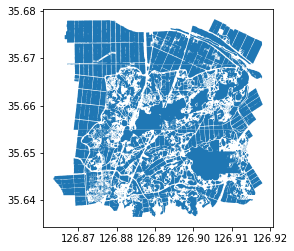

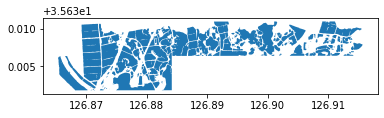

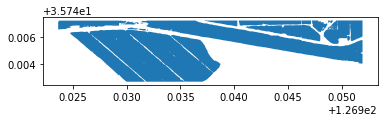

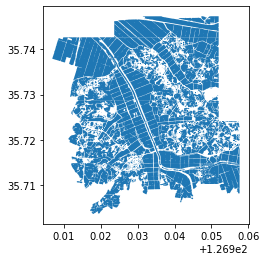

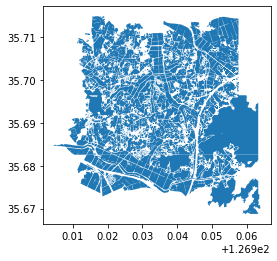

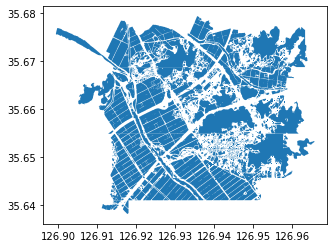

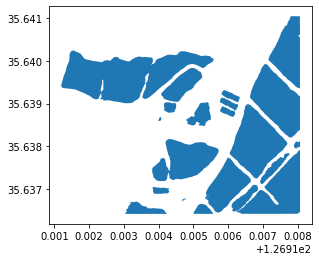

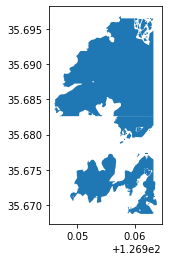

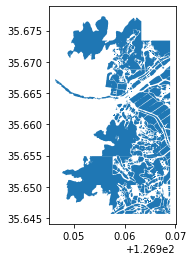

In [47]:
for t in tiles:
    t.plot()

# tiles_gdf = gpd.sjoin(gdf, df, op='intersects')
# # print(tiles_gdf.head())
# tiles_gdf.plot()

# arr = [Polygon(mercantile.feature(t)['geometry']['coordinates'][0]) for t in tiles]
# print(arr[0])

# arr = [Point(-74.0060, 40.7128), Point(-118.2437, 34.0522), Point(-87.6298, 41.8781)]
# print(arr[0])

# 타일링된 GeoDataFrame 객체를 생성합니다.
# tiles_gdf = gpd.sjoin(gdf, gpd.GeoDataFrame({'geometry': gpd.GeoSeries([mercantile.feature(t) for t in tiles])}, crs=gdf.crs), op='intersects')

# df = gpd.GeoDataFrame({'geometry': [Point(-74.0060, 40.7128), Point(-118.2437, 34.0522), Point(-87.6298, 41.8781)]},
#                       crs='EPSG:4326')
# df

In [ ]:
import folium


m = folium.Map(location=[45.5236, -122.6750])

In [ ]:
m